In [1]:
from eda_import import *

In [2]:
np.random.seed(0)

# Drawing samples from the same distribution

Experiment: draw two samples of sample size n from standard normal distribution, calculate the significance of their difference with t-test. Then, plot the distribution of p values.

2,5,10,20,40,100,

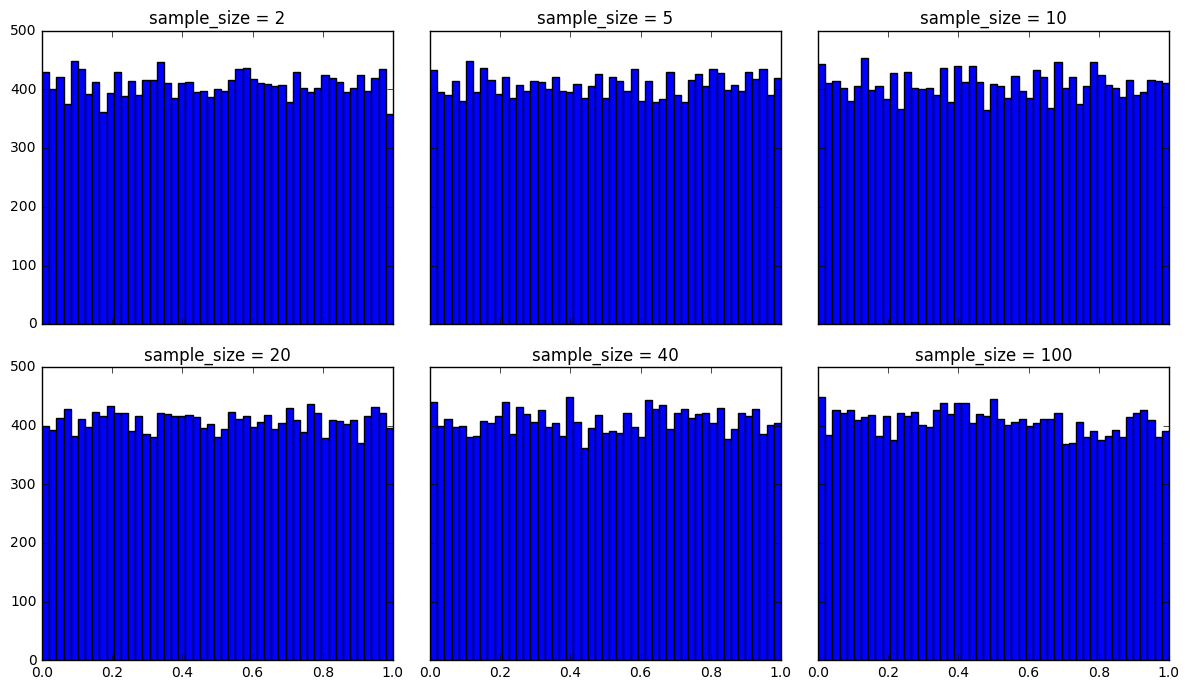

In [3]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 7))
axes = axes.ravel()

all_pvals = []
for k, size in enumerate([2, 5, 10, 20, 40, 100]):
    print(size, end=',')
    ax = axes[k]
    
    pvals = []
    for i in range(20000):
#         if (i + 1) % 1000 == 0:
#             print(i + 1, end=',')
        x1 = np.random.normal(0, 1, size)
        x2 = np.random.normal(0, 1, size)

        _, pval = stats.ttest_ind(x1, x2)
        pvals.append(pval)
    _ = ax.hist(pvals, bins=np.linspace(0, 1, 50))
    
    ax.set_title('sample_size = {0}'.format(size))
    all_pvals.append(pvals)
plt.tight_layout()

When the samples are from the same distribution, the p values are uniformly distributed regardless of sample size

# Drawing samples from different distributions

Experiment: fix one distribution to be normal, and the other one with increasingly shifted center.

0.1,0.2,0.5,1,2,4,

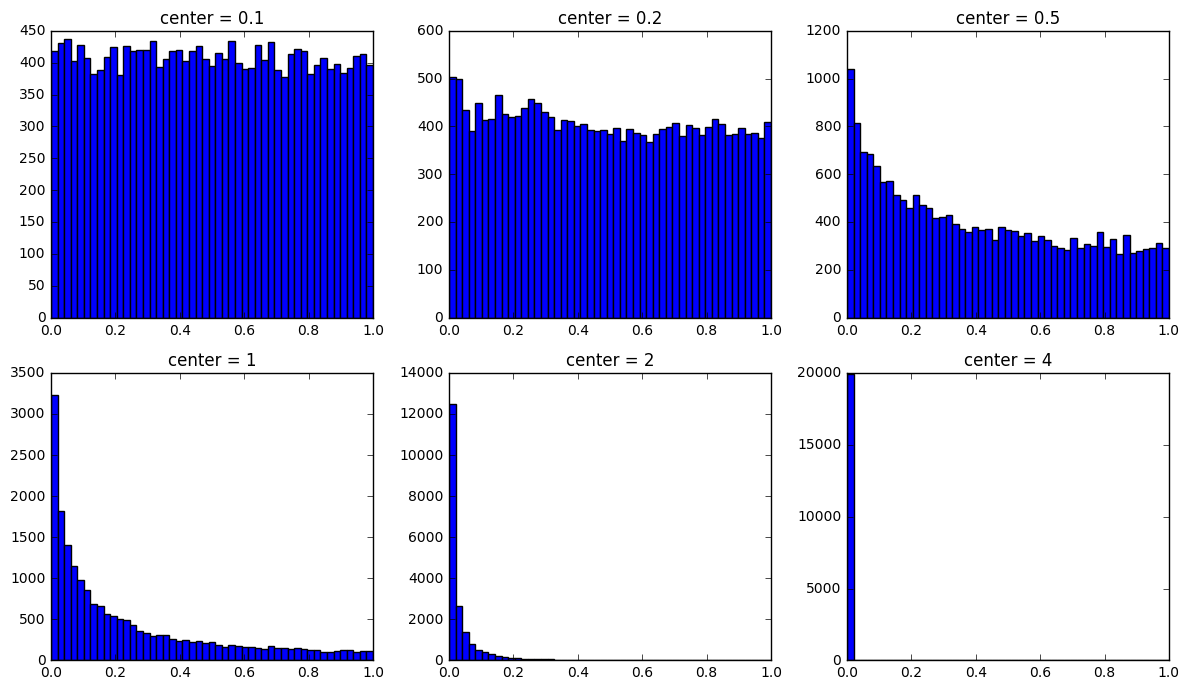

In [4]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(12, 7))
axes = axes.ravel()

all_pvals = []
for k, center in enumerate([0.1, 0.2, 0.5, 1, 2, 4]):
    print(center, end=',')
    ax = axes[k]
    
    pvals = []
    for i in range(20000):
        x1 = np.random.normal(0, 1, 5)
        x2 = np.random.normal(center, 1, 5)

        _, pval = stats.ttest_ind(x1, x2)
        pvals.append(pval)
    _ = ax.hist(pvals, bins=np.linspace(0, 1, 50))
    
    ax.set_title('center = {0}'.format(center))
    all_pvals.append(pvals)
plt.tight_layout()

When samples are from different distributions, p values are skewed to 0. When sample size is fixed, the skewness depends on how far away the two distributions are

Experiment: fix one distribution to be normal, and the other one with only slightly shifted center, then gradually increase sample size

5,10,20,40,80,100,

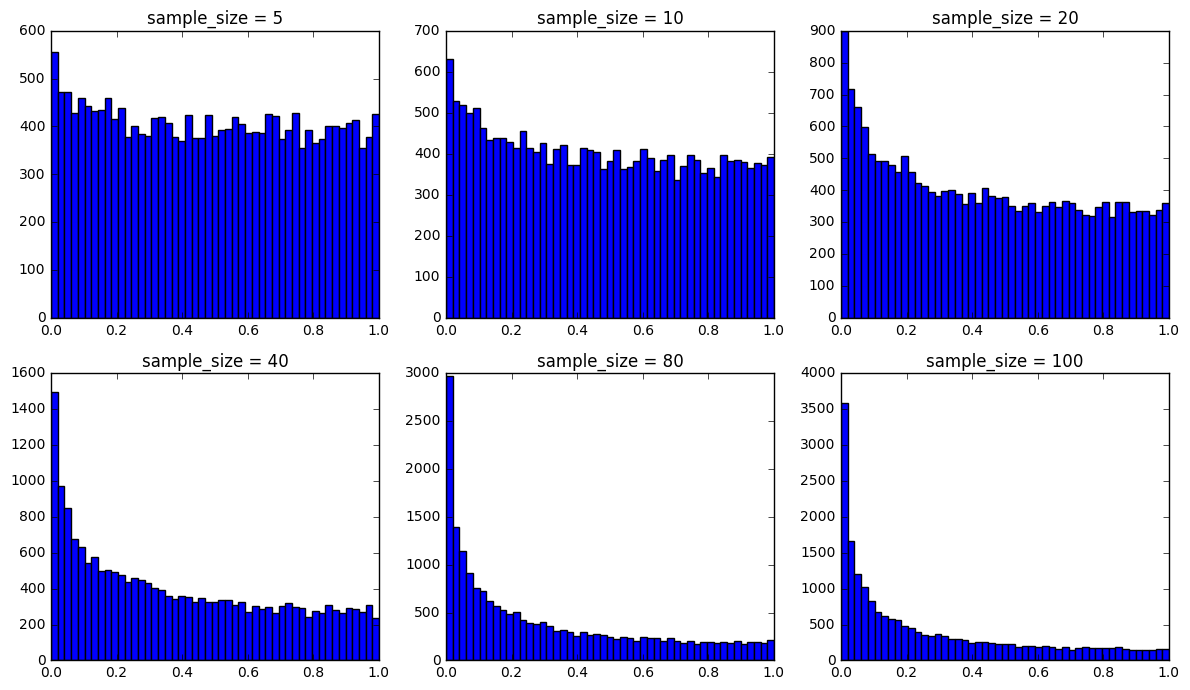

In [5]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(12, 7))
axes = axes.ravel()

all_pvals = []
for k, size in enumerate([5, 10, 20, 40, 80, 100]):
    print(size, end=',')
    ax = axes[k]
    
    pvals = []
    for i in range(20000):
        x1 = np.random.normal(0, 1, size)
        x2 = np.random.normal(0.2, 1, size)

        _, pval = stats.ttest_ind(x1, x2)
        pvals.append(pval)
    _ = ax.hist(pvals, bins=np.linspace(0, 1, 50))
    
    ax.set_title('sample_size = {0}'.format(size))
    all_pvals.append(pvals)
plt.tight_layout()

So the skewness is affected by how big the difference is between the two population distributions. When the difference is small, and the p value is large at small sample sizes (low statistical power), it can be lowered (with increased statistical power) by equivalently increasing sample size (equivalent to increasing the degree of freedoms).

# Besides, statistical power is also affected by variance in the distributions, and the variation determines how much statistical power will increase when the sample size is increased